In [122]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [123]:
# Twitter API Keys
consumer_key = "wNC3lUy34Zm8YYOkzhgRWXo0A"
consumer_secret = "Tgs4zKsSW05KmVhuZdvtXy3V7KXbGZdJJsG6BeWv3BwOl1CjGL"
access_token = "943239523047235584-OhbdaN1nJYFHzrpVBbFzOMTxbQaRDaj"
access_token_secret = "Rinpous00RQFCnvVMNWKxOgQZE5H0wxJ2GtjWSHGgq0uW"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [124]:
# Target Account
target_users = ["@BBC","@CBS","@CNN","@Fox","@nytimes"]
colors = {"@BBC":"lightblue","@CBS": "green","@CNN":"red","@Fox":"blue","@nytimes":"yellow"}
# Variables for holding sentiments
sentiments = []
counter = 0
for target_user in target_users:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user,count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

    # Print Tweets
    # print("Tweet %s: %s" % (counter, tweet["text"]))

    # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

    # Add sentiments for each tweet into an array
        sentiments.append({"Source Account": target_user,
                           "Color":colors[target_user],
                       "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1
# Counter
    counter = 1

In [129]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd
sentiments_pd.columns

Index(['Color', 'Compound', 'Date', 'Negative', 'Neutral', 'Positive',
       'Source Account', 'Tweets Ago'],
      dtype='object')

In [130]:
sentiments_pd.to_csv( "sentiments_pd.csv", index=False )

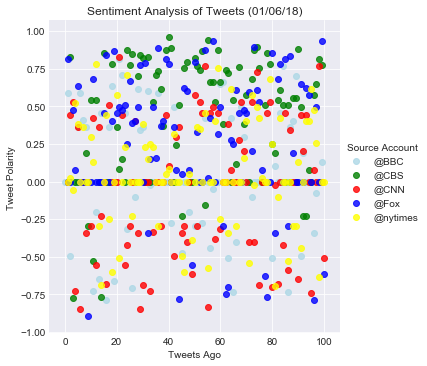

In [131]:
sns.set_style(style="darkgrid",rc=None)
#sns.set_context("notebook")
g = sns.lmplot(x="Tweets Ago", y="Compound", data= sentiments_pd, hue = "Source Account", palette = colors,fit_reg = False,size=5, aspect=1, markers='o',scatter = True)
g.set_axis_labels("Tweets Ago", "Tweet Polarity")
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.savefig("Sentiment Analysis of Tweets Scatter Plot" + ".png")
plt.show()

In [132]:
sentiments_pd_bysource = sentiments_pd.groupby("Source Account")
sentiments_pd_bysource_Compound = sentiments_pd_bysource["Compound"].mean()
sentiments_pd_bysource_Compound

Source Account
@BBC        0.047709
@CBS        0.402856
@CNN       -0.023233
@Fox        0.261138
@nytimes    0.053903
Name: Compound, dtype: float64

In [133]:
x_axis = np.arange(len(target_users))
barlist = plt.bar(x_axis,sentiments_pd_bysource_Compound,alpha=0.5, align="edge")
barlist[0].set_facecolor('lightblue')
barlist[1].set_facecolor('g')
barlist[2].set_facecolor('r')
barlist[3].set_facecolor('b')
barlist[4].set_facecolor('y')

In [134]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, target_users)

([<matplotlib.axis.XTick at 0x1efa5dffe48>,
 <a list of 5 Text xticklabel objects>)

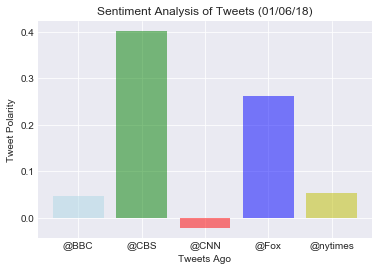

In [136]:
# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiment Analysis of Tweets-Bar chart" + ".png")
plt.show()